# Project Introduction

Face Expression Recognition (FER) technology has been advancing significantly in recent years, driven by the proliferation of computer vision and AI technologies. Global interest in FER is projected to grow exponentially over the next decade, with applications spanning from customer sentiment analysis to personalized user experiences.

The FER market is poised to expand dramatically, with estimates suggesting a 10X increase by 2025, reaching a market size of USD 3 billion. India, in particular, is expected to experience robust growth, achieving a compound annual growth rate (CAGR) of 50% and surpassing 15 million users by 2025. Despite this rapid growth, several challenges persist in accurately capturing and interpreting facial expressions in real-time scenarios.

In traditional face-to-face interactions, individuals can intuitively read facial cues to gauge emotions and adjust their responses accordingly. In digital interactions, such as video calls or virtual meetings, this nuanced communication can be lost. Platforms like Zoom or Teams, which are widely used for virtual interactions, often struggle to effectively monitor and interpret facial expressions in larger groups (25-50 participants), hindering the ability to assess engagement and emotional responses accurately.

However, the integration of deep learning and machine learning techniques in FER offers promising solutions to these challenges. By analyzing facial data captured through video, audio, and textual inputs, advanced algorithms can decode emotional states with high accuracy. This not only addresses the surveillance limitations inherent in digital platforms but also mitigates human biases in interpretation. Data-driven insights gleaned from FER systems provide objective metrics that can track emotional dynamics and engagement levels over time, enhancing the overall quality and effectiveness of digital interactions.

In summary, while digital platforms initially face challenges in capturing and interpreting facial expressions compared to face-to-face interactions, leveraging deep learning and AI technologies in FER promises to revolutionize the way emotions are understood and utilized in various applications.

## TensorFlow and Keras Image Classification Script
This script utilizes TensorFlow and Keras to build a convolutional neural network (CNN) for image classification tasks. It includes data preprocessing, model architecture definition, training, and evaluation using common machine learning metrics and techniques.

In [27]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import utils
from keras.models import Model, Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization,GlobalMaxPool2D,Activation,GlobalAveragePooling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from tensorflow.keras import Model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img, img_to_array
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers
import numpy as np 
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
import itertools

In [35]:
# Defining train and validation path
train_path = './images/train'
val_path = './images/validation'

In [36]:
categories = os.listdir(train_path)
print(categories)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


## Data Description
The dataset used in this project originates from the "Challenges in Representation Learning: Facial Expression Recognition Challenge" hosted on Kaggle. It comprises grayscale images of faces, each resized to 48x48 pixels. The images have been preprocessed to ensure the face is centered and occupies a consistent portion of the image across the dataset. In total, there are approximately 36,000 images distributed across 7 emotion categories.

### Dataset Structure:
Training Data:

### Contains images categorized into 7 emotions:
Angry
Disgust
Fear
Happy
Neutral
Sad
Surprise
The training dataset is further divided into individual folders for each emotion category.
Validation Data:

Similar to the training data, the validation dataset also includes images categorized into the same 7 emotions.
This dataset serves for evaluating model performance after training.
Data Split:
Train-Validation Split:
80% of the images are allocated to the training set (train folder).
20% of the images are allocated to the validation set (validation folder).
This structured dataset enables training and evaluation of facial expression recognition models using machine learning techniques, with each image associated with a single emotion label for supervised learning tasks.



In [37]:
total_train_images = 0
for dir_ in os.listdir(train_path):
    count = 0
    for f in os.listdir(train_path+'/' + dir_+"/"):
        count += 1
        total_train_images += 1
    print(f"{dir_} has {count} number of images")
    
print(f"\ntotal train imagess are {total_train_images}")

angry has 3993 number of images
disgust has 436 number of images
fear has 4103 number of images
happy has 7164 number of images
neutral has 4982 number of images
sad has 4938 number of images
surprise has 3205 number of images

total train imagess are 28821


In [38]:
# Validation Images
total_validation_images = 0
for dir_ in os.listdir(val_path):
    count = 0
    for f in os.listdir(val_path+'/' + dir_+"/"):
        count += 1
        total_validation_images += 1
    print(f"{dir_} has {count} number of images")
    
print(f"\ntotal validation images are {total_validation_images}")

angry has 960 number of images
disgust has 111 number of images
fear has 1018 number of images
happy has 1825 number of images
neutral has 1216 number of images
sad has 1139 number of images
surprise has 797 number of images

total validation images are 7066


In [39]:
def imageshow(category):
  plt.figure(figsize= (8,8))
  for i in range(1, 10, 1):
      plt.subplot(3,3,i)
      img = load_img(train_path+'/'+category+"/"+
                    os.listdir(train_path + "/" + category)[i], target_size=(48,48))
      plt.imshow(img)
  plt.suptitle(category,fontsize=30)   
  plt.show()

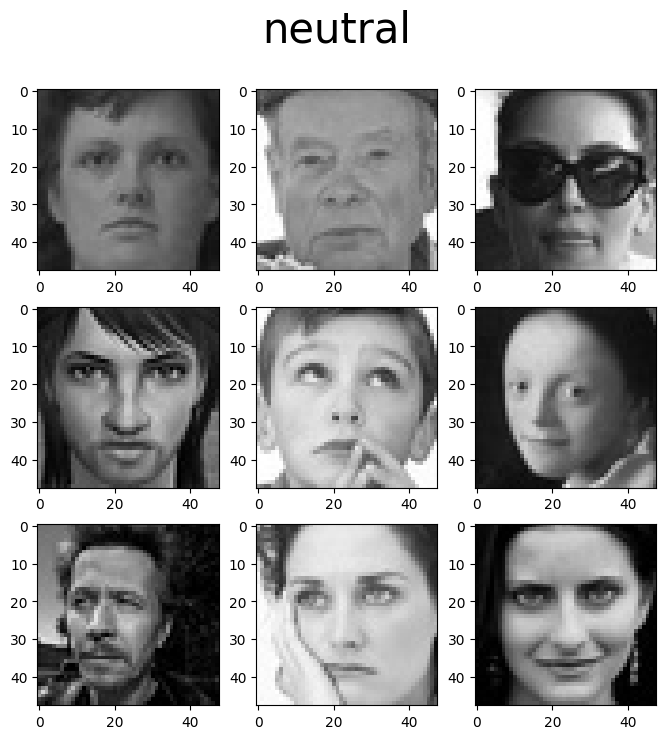

In [40]:
imageshow('neutral')

In [41]:
img_size = 224
batch_size = 32

datagen_train = ImageDataGenerator(rescale=1./255)   

train_generator = datagen_train.flow_from_directory(train_path,
                                                  target_size=(img_size,img_size),
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  color_mode='rgb',
                                                  class_mode='categorical')

datagen_validation = ImageDataGenerator(rescale=1./255)

validation_generator = datagen_validation.flow_from_directory(val_path,
                                                  target_size=(img_size,img_size),
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  color_mode='rgb',
                                                  class_mode='categorical')

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [42]:
from tensorflow.keras.applications.resnet50 import ResNet50

# ResNet50

In [43]:
resnet = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)

In [44]:
for layer in resnet.layers:
  layer.trainable = False

In [45]:
x = Flatten()(resnet.output)
prediction = Dense(7, activation='softmax')(x)

In [46]:
model = Model(inputs=resnet.input, outputs=prediction)

In [47]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [48]:
model.summary()

Model: "functional_121"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,290,183 (92.66 MB)

 Trainable params: 702,471 (2.68 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

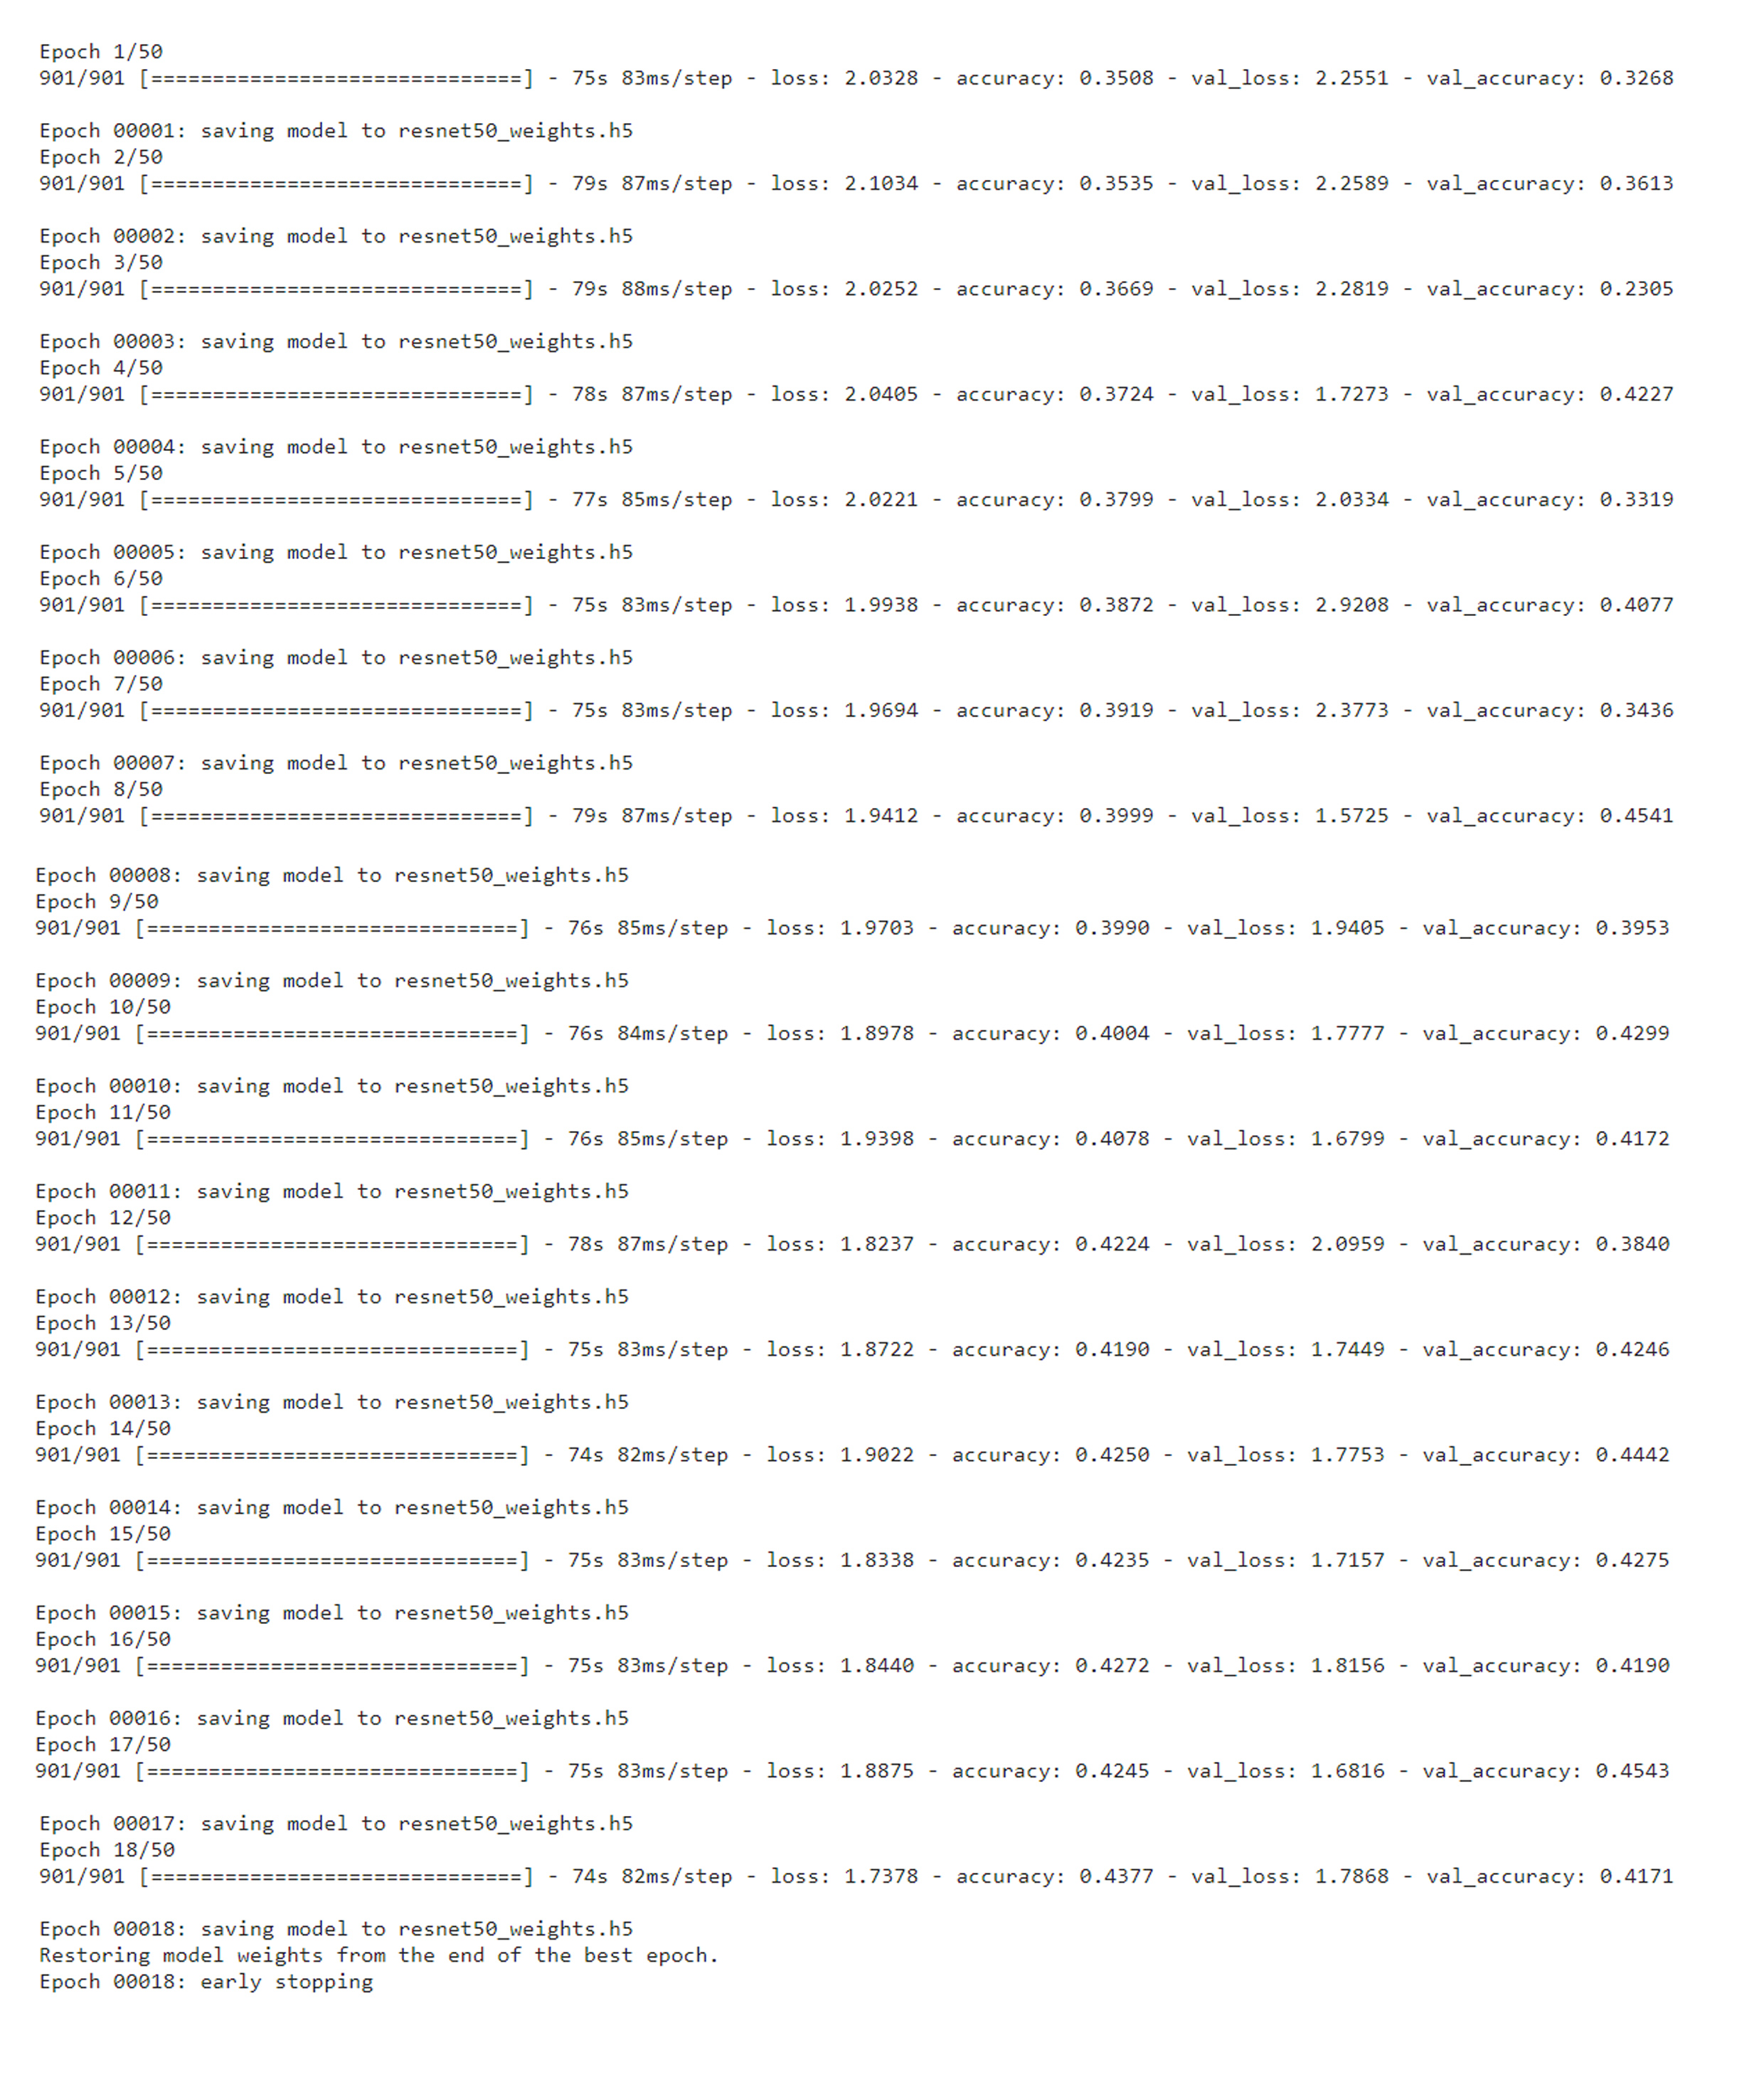

# Custom CNN Model

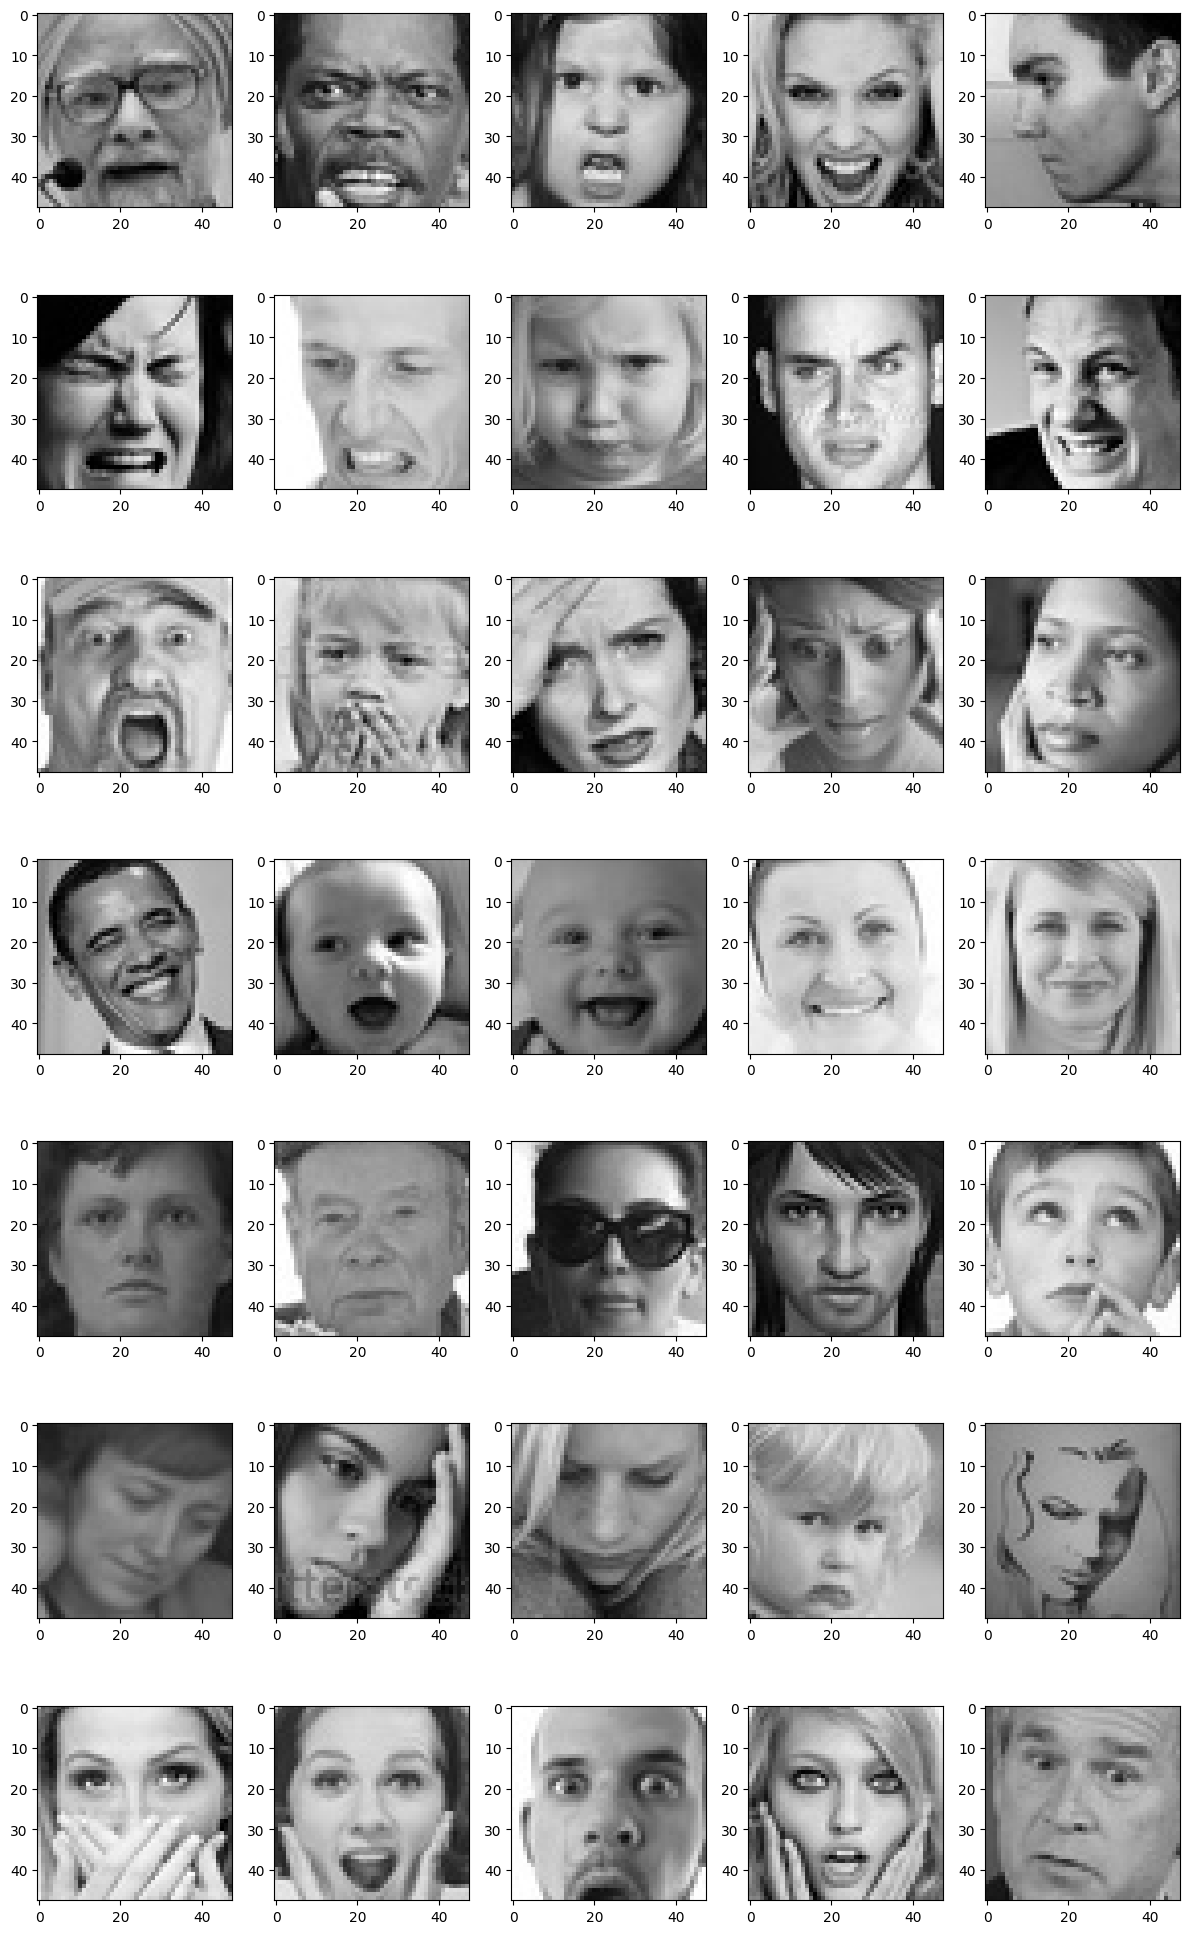

In [28]:
# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = "./images/"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "train"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

In [60]:
batch_size = 128
base_path = "./images/"


train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 20,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale= 1.0/255)

train_generator = train_datagen.flow_from_directory(base_path + "train",
                                                    target_size=(56,56),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(base_path + "validation",
                                                    target_size=(56,56),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [62]:
nb_classes = 7

# Initialising the CNN
model1 = Sequential()

# 1 - Convolution
model1.add(Conv2D(64,(3,3), padding='same', input_shape=(56, 56,1)))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

# 2nd Convolution layer
model1.add(Conv2D(128,(5,5), padding='same'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

# 3rd Convolution layer
model1.add(Conv2D(512,(3,3), padding='same'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

# 4th Convolution layer
model1.add(Conv2D(512,(3,3), padding='same'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

# Flattening
model1.add(Flatten())

# Fully connected layer 1st layer
model1.add(Dense(256))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.25))

# Fully connected layer 2nd layer
model1.add(Dense(512))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.25))

model1.add(Dense(nb_classes, activation='softmax'))

print(model1.summary())

opt = Adam(learning_rate=0.0001)
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\Admin\OneDrive\Desktop\ML\ML\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 56, 56, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_30 (Activation)      │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 28, 28, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_31 (Activation)      │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 14, 14, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 14, 14, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_32 (Activation)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 7, 7, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_33 (Activation)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 256)            │         1,02

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

None


In [ ]:
%%time

# number of epochs to train the NN
epochs = 50

# checkpoint to save best model
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit(train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

In [64]:
model1.load_weights("finalfinal.h5")

In [65]:
val_path = './images/validation'

In [67]:
validation_loss, validation_accuracy = model1.evaluate(validation_generator, verbose=1)
print(f'Validation accuracy: {validation_accuracy:.4f}')

56/56 ━━━━━━━━━━━━━━━━━━━━ 24s 411ms/step - accuracy: 0.5372 - loss: 1.1964
Validation accuracy: 0.6144
